<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [ ]:

# Your code here


### 1.2 NumPy’s PRNG

In [1]:
np.random.rand()

0.626814562599784

In [2]:
np.random.rand(10)

array([0.27633768, 0.61931833, 0.21168467, 0.7681068 , 0.05635491,
       0.25142677, 0.41440045, 0.64094102, 0.69134601, 0.83158193])

In [3]:
np.random.rand(5,2)

array([[0.85875868, 0.03972808],
       [0.44150027, 0.6219501 ],
       [0.98106387, 0.84364072],
       [0.45756957, 0.58970765],
       [0.0821872 , 0.20481082]])

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

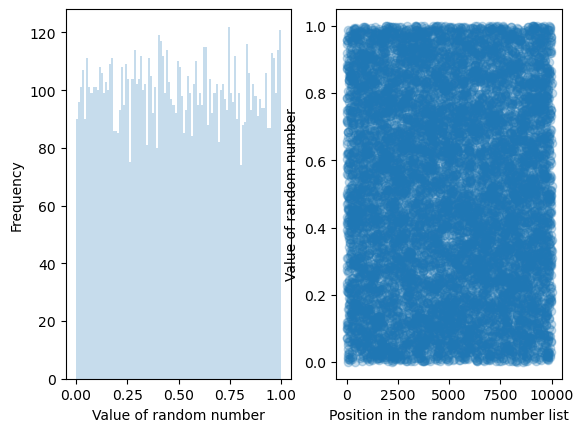

In [2]:
from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")


### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

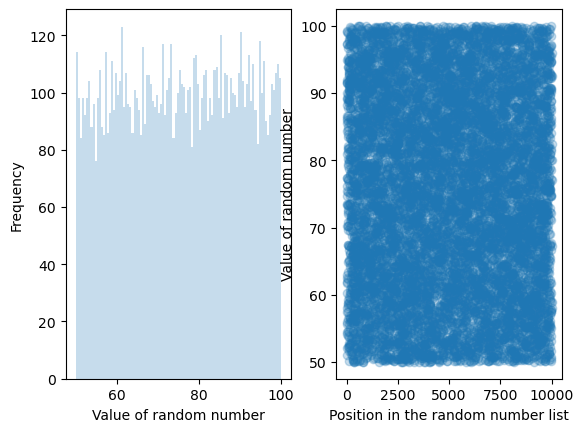

In [14]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [15]:
np.random.randint(0, 100, 10)

array([ 6, 66, 77, 78, 76, 79,  0, 71, 87, 45])

In [17]:
np.random.seed(1234)
np.random.randint(0, 100, 10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [19]:
np.random.seed(1234)
np.random.randint(0, 100, 10) # seed generates the same set of numbers

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [21]:
def shake_magic_8():
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [25]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Better not tell you now.

Q: Will I be rich?
A: As I see it, yes.

Q: Will I be in trouble?
A: Without a doubt.



## 3 Flipping Coins

### 3.1 A fair coin

In [26]:
np.random.choice(['Head', 'Tails'])

'Head'

In [27]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Tails', 'Tails', 'Tails', 'Head', 'Tails', 'Tails',
       'Head', 'Tails', 'Head'], dtype='<U5')

In [36]:
def flip_coins(no_of_coins, probability = .5):
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [50]:
flip_coins(1000)
print(f'Number of heads: {flip_coins(1000)/1000*100:.2f}%')

Number of heads: 49.40%


### 3.2 A biased coin

In [6]:
def flip_coins(no_of_coins, probability = .3):
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [7]:
flip_coins(1000)
print(f'Number of heads: {flip_coins(1000)/1000*100:.2f}%')

Number of heads: 70.90%


### 3.3 A flipping experiment

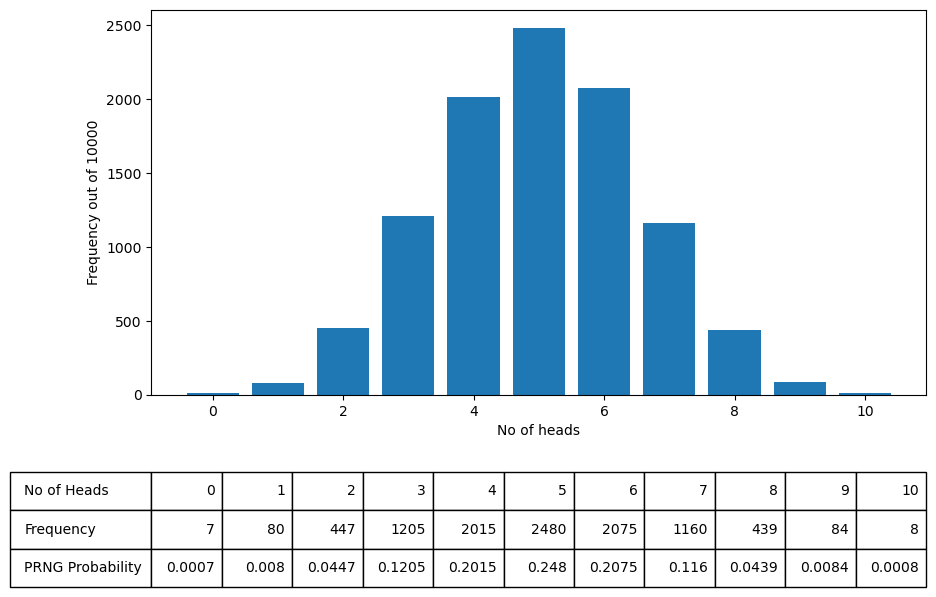

In [3]:
def flip_coins(no_of_coins, probability = .5):
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_repeats = 10_000
result = [flip_coins(no_of_coins = 10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom', bbox=[0, -0.5, 1, 0.3])

In [9]:
from scipy.stats import binom

In [10]:
binom.pmf(k=7, n=10, p=.5)

0.11718749999999999

## Exercise 1 :  12C, 13C

What are the mean and the standard deviation for the number of 13C atoms in a molecule of cholesterol (C27H44O)?

27 C atoms, probability of it being a 13C is 1.11%

In [20]:
print(np.sum(np.random.rand(27) < .0111))

0


In [24]:
def carbon_isotopes(no_of_carbons, probability = .0111):
    results = np.random.rand(no_of_carbons)
    no_of_13 = np.sum(results < probability)
    return no_of_13

no_of_carbons = 27
no_of_repeats = 100
result = [carbon_isotopes(no_of_carbons) for i in range(no_of_repeats)]

mean = np.mean(result)
std_dev = np.std(result)

print('Mean:', mean, 'Standard deviation:', std_dev)

Mean: 0.3 Standard deviation: 0.574456264653803


In [7]:
no_of_repeats = 10_000
result = [carbon_isotopes(no_of_carbons = 27) for i in range(no_of_repeats)]
no_of_13, counts = np.unique(result, return_counts = True)
probability_of_no_13 = counts[0]/no_of_repeats*100
print(f'Probability that a cholesterol molecule has no atoms of 13C: {probability_of_no_13:.2f}%')

Probability that a cholesterol molecule has no atoms of 13C: 74.18%
